In [36]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

This class was originally seen on https://github.com/pytorch/pytorch/issues/1333 and I am just trying to understand it so that I will then be able to do my own

In [2]:
class CausalConv1d(nn.Conv1d):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, dilation=1, groups=1, bias=True):
        super(CausalConv1d, self).__init__( in_channels, out_channels, kernel_size, stride=stride, padding=0,
            dilation=dilation, groups=groups, bias=bias)

        self.left_padding = dilation * (kernel_size - 1)

    def forward(self, input):
#         print("Input: ")
#         print(input)
        
        temp = torch.unsqueeze(input, 0)
#         print("Unsqueeze: ")
#         print(temp)
        
        x = F.pad(temp, (self.left_padding, 0, 0, 0))
#         print("Pad: ")
#         print(x)
        
        x = torch.squeeze(x, 0)
#         print("Squeeze: ")
#         print(x)
        
        self.weight = nn.Parameter(torch.Tensor([[[2, 0]]]))
#         print("Wheights: ")
#         print(self.weight)
        
        self.bias = nn.Parameter(torch.Tensor([0]))
#         print("Bias: ")
#         print(self.bias)
        
        return super(CausalConv1d, self).forward(x)

In [3]:
causal = CausalConv1d(1, 1, 2)
print(causal)

CausalConv1d (1, 1, kernel_size=(2,), stride=(1,))


In [4]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(causal.parameters(), lr=0.001, momentum=0.9)

In [5]:
input = Variable(torch.Tensor([[[1, 2, 3, 4]]]).type(torch.FloatTensor))
print(input)

target = Variable(torch.Tensor([0]).type(torch.LongTensor))
print(target)

Variable containing:
(0 ,.,.) = 
  1  2  3  4
[torch.FloatTensor of size 1x1x4]

Variable containing:
 0
[torch.LongTensor of size 1]



In [6]:
output = causal(input)
print(output)
output = torch.squeeze(output, 0)
print(output)

Variable containing:
(0 ,.,.) = 
  0  2  4  6
[torch.FloatTensor of size 1x1x4]

Variable containing:
 0  2  4  6
[torch.FloatTensor of size 1x4]



In [ ]:
optimizer.zero_grad()   # zero the gradient buffers
loss = criterion(output, target)
loss.backward()
optimizer.step()

In [ ]:
Variable(torch.arange(1, 11))

In [10]:
import numpy as np
a = torch.randn(1,1,2)
b = a.numpy()
b[:,:,1] = 0
c = torch.from_numpy(b)
weight = nn.Parameter(c)
print(weight)

Parameter containing:
(0 ,.,.) = 
 -2.2297  0.0000
[torch.FloatTensor of size 1x1x2]



In [31]:
weight = nn.Parameter(torch.randn(1,1,2))
print(weight)
mask = nn.Parameter(torch.Tensor([[[1, 0]]]))
print(mask)
weight*mask[0]

Parameter containing:
(0 ,.,.) = 
  2.9547  0.3149
[torch.FloatTensor of size 1x1x2]

Parameter containing:
(0 ,.,.) = 
  1  0
[torch.FloatTensor of size 1x1x2]



Variable containing:
(0 ,.,.) = 
  2.9547  0.0000
[torch.FloatTensor of size 1x1x2]

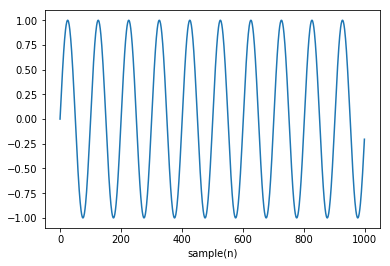

In [42]:
Fs = 44100
f = 440
sample = 44100
x = np.arange(sample)
# print(x)
y = np.sin(2 * np.pi * f * x / Fs)

plt.plot(x[0:1000], y[0:1000])
plt.xlabel('sample(n)')
plt.show()

In [138]:
def SinGenerator():
    start = np.random.uniform(-10, 10, size=1)
    x = np.linspace(start, start+2*np.pi, 100)
    return x

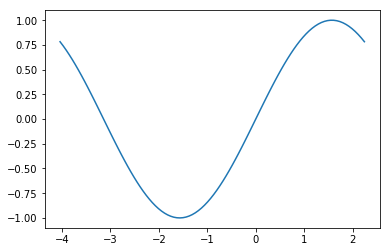

In [131]:
SinGenerator()

In [165]:
data = []
for _ in range(1000):
    temp = SinGenerator()
    data.append(temp[0:99])
    data.append(temp[99:100])

In [171]:
import pandas as pd 
df = pd.DataFrame(data)
df.to_csv("file_path.csv", index=False, header=False)